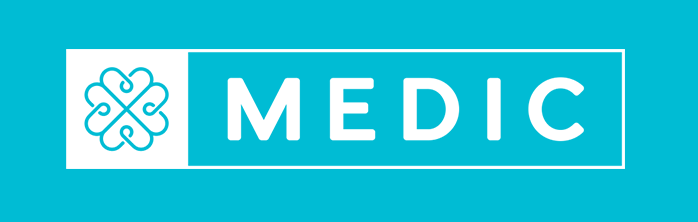

# Monitoring Energy Difference to Improve Cure - Diabetes

###### Fact: Diabetes is a growing epidemic with a devastating physical, emotional and financial toll on the people of US.
    
It kills more americans each year than AIDS and breast Cancer COMBINED. 
                                                                        - American Diabetes Association

##### Cytosolve: Breakthrough in Health Care

Received FDA approval for computer desined medicine

https://cytosolve.com/2016/10/04/received-fda-allowance-for-multi-combination-drug/

#### Analysing Diabetes data, collected from 130 Hospitals in the US for 9 years.

### Loading the data

In [119]:
# Import library files and load the diabetes data using it.
import pandas as pd
data2=pd.read_csv('diabetic_data.csv')
pd.set_option('display.max_columns', None) #To display all the columns
data2.shape #Displays the number of instances and attributes of the dataset

(101766, 50)

In [120]:
data2.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Pre-Processing

In [121]:
#Selecting the required variables

data = data2.loc[:, ['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital', 'medical_specialty',
                    'num_lab_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 
                    'A1Cresult', 'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted']]

In [122]:
#Converting the "?" values to "nan"

import numpy as np
data.replace({'?': np.nan}, inplace=True)

In [123]:
data.medical_specialty.isnull().sum()

49949

### Converting object varibales to Numerical

In [124]:
def new_race(x):
    if x == 'AfricanAmerican':
        return 1
    if x == 'Asian':
        return 2
    if x == 'Caucasian':
        return 3
    if x == 'Other':
        return 4

data['race']=data['race'].apply(new_race)

def new_sex(x):
    if x == 'Male':
        return 1
    if x == 'Female':
        return 0
data['gender']=data['gender'].apply(new_sex)

def new_age(x):
    if x == '[0-10)':
        return 10
    if x == '[10-20)':
        return 15
    if x == '[20-30)':
        return 25
    if x == '[30-40)':
        return 35
    if x == '[40-50)':
        return 45
    if x == '[50-60)':
        return 55
    if x == '[60-70)':
        return 65
    if x == '[70-80)':
        return 75
    if x == '[80-90)':
        return 85
    if x == '[90-100)':
        return 95

data['age']=data['age'].apply(new_age)

def new_medicalspecialty(x):
    if x == 'Cardiology':
        return 1
    if x == 'Dentistry':
        return 2
    if x == 'Family/GeneralPractice':
        return 3
    if x == 'InternalMedicine':
        return 4
    if x == 'ObstetricsandGynecology':
        return 5
    if x == 'Pediatrics':
        return 6
    if x == 'Psychiatry':
        return 7
    if x == 'Surgery-General':
        return 8   

data['medical_specialty']=data['medical_specialty'].apply(new_medicalspecialty)

In [125]:
#Converting ICD codes to numeric

data['diag_1'] = pd.to_numeric(data['diag_1'], errors='coerce')
data['diag_2'] = pd.to_numeric(data['diag_2'], errors='coerce')
data['diag_3'] = pd.to_numeric(data['diag_3'], errors='coerce')
data.info() #Displays the datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 18 columns):
race                  97456 non-null float64
gender                101763 non-null float64
age                   101766 non-null int64
admission_type_id     101766 non-null int64
time_in_hospital      101766 non-null int64
medical_specialty     32309 non-null float64
num_lab_procedures    101766 non-null int64
num_medications       101766 non-null int64
diag_1                100100 non-null float64
diag_2                98872 non-null float64
diag_3                95285 non-null float64
number_diagnoses      101766 non-null int64
A1Cresult             101766 non-null object
metformin             101766 non-null object
insulin               101766 non-null object
change                101766 non-null object
diabetesMed           101766 non-null object
readmitted            101766 non-null object
dtypes: float64(6), int64(6), object(6)
memory usage: 14.0+ MB


In [126]:
#Converting the rest of the varibales to numeric

def n(x):
    if x == '>7':
        return 2
    if x == '>8':
        return 3
    if x == 'None':
        return 0
    if x == 'Norm':
        return 1

data['A1Cresult']=data['A1Cresult'].apply(n)

def n(x):
    if x == 'Down':
        return 1
    if x == 'No':
        return 2
    if x == 'Steady':
        return 3
    if x == 'Up':
        return 4

data['metformin']=data['metformin'].apply(n)

def n(x):
    if x == 'Down':
        return 1
    if x == 'No':
        return 2
    if x == 'Steady':
        return 3
    if x == 'Up':
        return 4

data['insulin']=data['insulin'].apply(n)

def n(x):
    if x == 'No':
        return 0
    if x == 'Ch':
        return 1

data['change']=data['change'].apply(n)

def n(x):
    if x == 'No':
        return 0
    if x == 'Yes':
        return 1

data['diabetesMed']=data['diabetesMed'].apply(n)

def n(x):
    if x == 'NO':
        return 0
    if x == '<30':
        return 1
    if x == '>30':
        return 2

data['readmitted']=data['readmitted'].apply(n)

data.head()
# This data is now completely converted to numeric (Int or Float type) to fit in prediction models.

,race,gender,age,admission_type_id,time_in_hospital,medical_specialty,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
0,3.0,0.0,10,6,1,NaN,41,1,250.83,NaN,NaN,1,0,2,2,0,0,0
1,3.0,0.0,15,1,3,NaN,59,18,276.00,250.01,255.0,9,0,2,4,1,1,2
2,1.0,0.0,25,1,2,NaN,11,13,648.00,250.00,NaN,6,0,2,2,0,1,0
3,3.0,1.0,35,1,2,NaN,44,16,8.00,250.43,403.0,7,0,2,4,1,1,0
4,3.0,1.0,45,1,1,NaN,51,8,197.00,157.00,250.0,5,0,2,3,1,1,0


In [127]:
data = data[data.A1Cresult != 0]

In [128]:
data = data.dropna()
data.info()
#The final pre-processed dataset, with non-null values and numeric datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5124 entries, 26 to 101747
Data columns (total 18 columns):
race                  5124 non-null float64
gender                5124 non-null float64
age                   5124 non-null int64
admission_type_id     5124 non-null int64
time_in_hospital      5124 non-null int64
medical_specialty     5124 non-null float64
num_lab_procedures    5124 non-null int64
num_medications       5124 non-null int64
diag_1                5124 non-null float64
diag_2                5124 non-null float64
diag_3                5124 non-null float64
number_diagnoses      5124 non-null int64
A1Cresult             5124 non-null int64
metformin             5124 non-null int64
insulin               5124 non-null int64
change                5124 non-null int64
diabetesMed           5124 non-null int64
readmitted            5124 non-null int64
dtypes: float64(6), int64(12)
memory usage: 760.6 KB


In [129]:
# Creating a column for Diabetes, and assigning people who are affected by it '1' and not affected by '0'

data.loc[data['A1Cresult'] == 1, 'Diabetes'] = 0
data.loc[data['A1Cresult'] == 2, 'Diabetes'] = 1
data.loc[data['A1Cresult'] == 3, 'Diabetes'] = 1

data.head(10)

,race,gender,age,admission_type_id,time_in_hospital,medical_specialty,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,insulin,change,diabetesMed,readmitted,Diabetes
26,3.0,1.0,85,1,6,1.0,64,18,427.00,428.00,414.00,7,2,3,2,1,1,0,1.0
74,3.0,0.0,75,1,5,1.0,34,17,414.00,411.00,276.00,7,2,2,4,1,1,2,1.0
98,4.0,0.0,55,1,2,8.0,53,6,590.00,250.01,401.00,3,3,2,4,1,1,0,1.0
107,3.0,0.0,85,1,3,3.0,34,11,427.00,428.00,414.00,8,1,2,2,0,0,2,0.0
114,3.0,1.0,75,1,14,1.0,78,19,434.00,250.60,250.70,8,1,2,4,1,1,1,0.0
125,1.0,0.0,35,6,8,4.0,62,21,250.32,403.00,276.00,9,3,2,3,1,1,2,1.0
132,3.0,0.0,65,6,7,4.0,72,22,599.00,788.00,250.82,9,3,2,4,1,1,2,1.0
136,4.0,0.0,65,6,10,4.0,60,15,402.00,250.01,424.00,9,3,2,4,1,1,1,1.0
141,3.0,0.0,65,6,7,1.0,43,20,410.00,250.01,493.00,6,3,3,1,1,1,0,1.0
148,3.0,0.0,55,6,3,1.0,18,27,574.00,250.01,496.00,6,2,2,3,0,1,0,1.0


In [130]:
data.isnull().sum()

race                  0
gender                0
age                   0
admission_type_id     0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_medications       0
diag_1                0
diag_2                0
diag_3                0
number_diagnoses      0
A1Cresult             0
metformin             0
insulin               0
change                0
diabetesMed           0
readmitted            0
Diabetes              0
dtype: int64

# Exploratory Data Analysis:

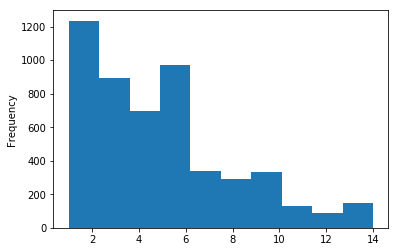

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

data.time_in_hospital.plot('hist')

#EDA 1
#Number of days the patient stayed in the hospital

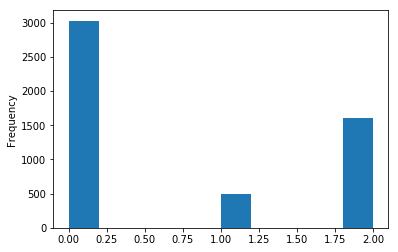

In [23]:
#EDA 2
#Number of patients who were readmitted

data.readmitted.plot('hist')

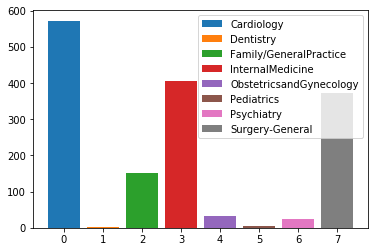

In [25]:
#EDA 3
#Patients from different medical specialty

data3=data2[data2.weight != "?"]
data4=data3[data3.race != "?"]
data5=data4[data4.diag_2 != "?"]
data6=data5[data5.medical_specialty != "?"]

df3 = pd.DataFrame(data6, columns= ["medical_specialty"])

labels = []
for i, dfi in enumerate(df3.groupby(["medical_specialty"])):
    labels.append(dfi[0])
    plt.bar(i, dfi[1].count(), label=dfi[0]) 
plt.xticks()
plt.legend()
plt.show()

## Fact: Diabetes Drug Reverses Alzheimer’s Symptoms in Mice; Reduces Brain Plaque Buildup and Improves Memory

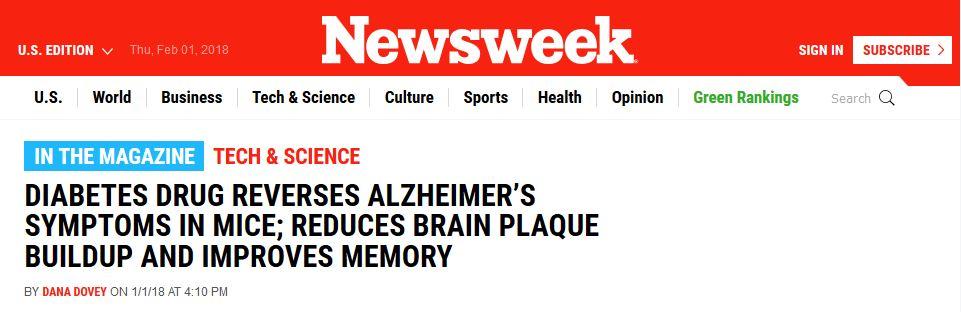

A Jupyter Widget

A Jupyter Widget

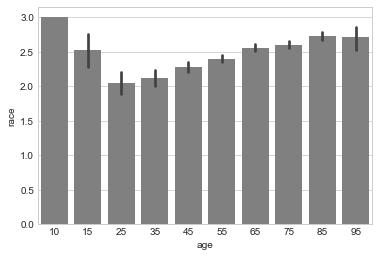

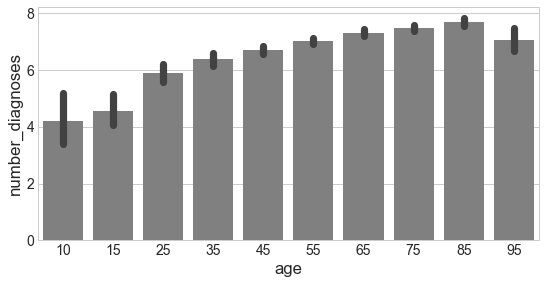

In [28]:
#EDA 4
#Interactive Graph

import seaborn as sns

from ipywidgets import widgets
from IPython.display import display

columns = data.columns.tolist()

selection = widgets.Dropdown(description="Which column should be graphed")
selection.options = columns
display(selection)

def on_button_clicked(b):
    sns.set_style("whitegrid")
    sns.set_context(rc={"figure.figsize": (12, 9)})
    sns.barplot(x='age', y=selection.value, data=data, color='grey')


button = widgets.Button(description="Make Graph")
display(button)

button.on_click(on_button_clicked)

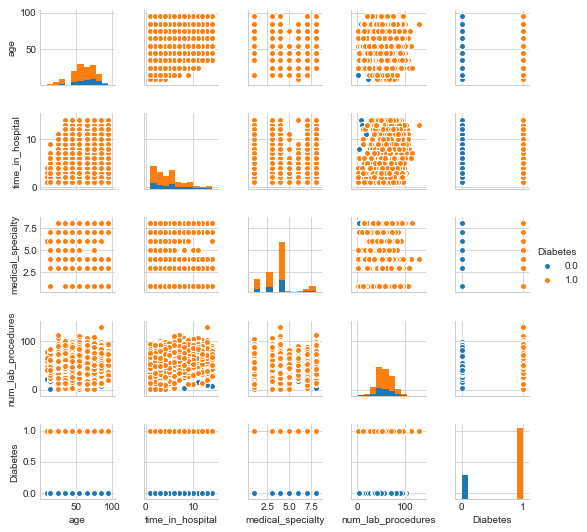

In [29]:
#EDA 5
show = sns.pairplot(data.drop(['number_diagnoses', 'A1Cresult', 'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted', 'diag_2', 'diag_3', 'race', 'gender', 'admission_type_id', 'diag_1', 'num_medications'], axis=1), hue='Diabetes', size=1.5, diag_kind='hist')

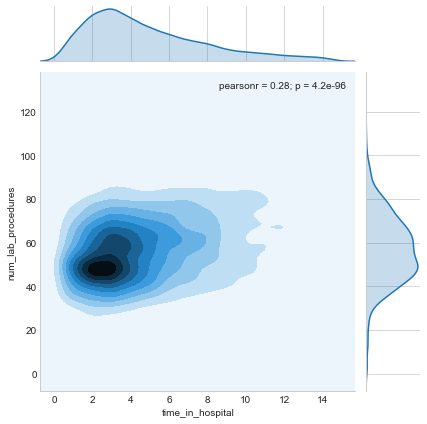

In [32]:
#EDA 6
import seaborn as sns
sns.jointplot(data=data, x='time_in_hospital', y='num_lab_procedures', kind='kde')

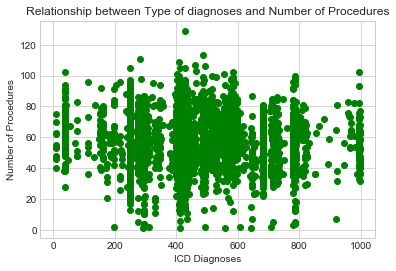

In [33]:
#EDA 7

# Labels for x-axis and y-axis
plt.xlabel("ICD Diagnoses")
plt.ylabel("Number of Procedures")

# Title of the Graph
plt.title("Relationship between Type of diagnoses and Number of Procedures")

# Type of Plot
plt.scatter(data['diag_1'], data['num_lab_procedures'], color = 'green')
plt.show()

# Model 1: Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

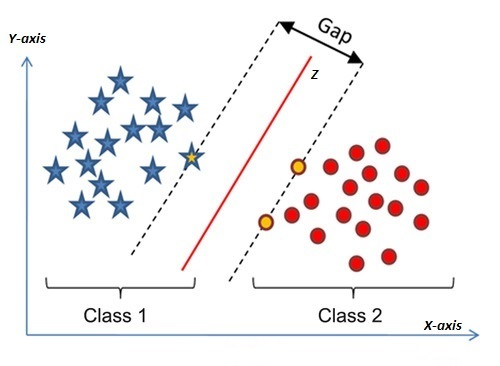

The graph denotes a simple classification of how support vector machines work on the training data. Here, we will have to assume that the input data has mainly of 2 classes. Their data points are plotted on the graph. One class is of shapes circles, and another one is of stars. These data points are scattered on the graph. It represents how the original data is scattered in the training data. These data points represent the values of real data and where they stand in a graph. The main objective of any classifier is to separate bunch of data points in to different classes. Here, in the figure-6, we can see that there are two main types of data points which are classified into class1 and class2. These two classes represent the two different variety of data available in training dataset. These data points are depicted on a graph with x-axis and y-axis as coordinates.

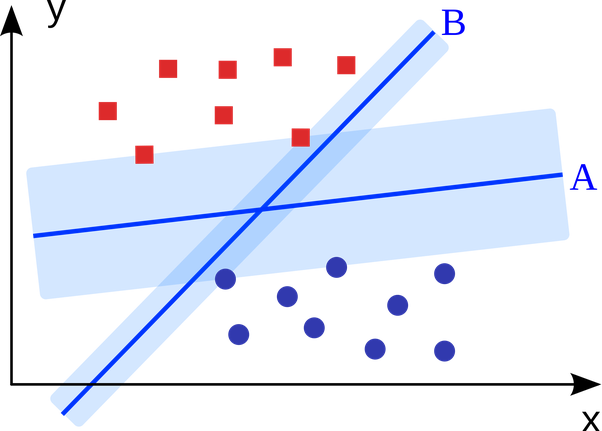

#### A > B

## g((x)) ⃗=( ω) ⃗^T x ⃗+ ω_"0" 

## The final value of g (x ⃗) is called the support vector machine.

# SVM Predictive Modelling in python

###### Predicting the patients readmission to hospital

In [73]:
# Assign predictors to a variable of ndarray (matrix) type.

array = data.values
X = array[:,0:16] #Feature variables, that the model learns the pattern in the dataset
y = array[:,17] #Target varibale, the pattern learned is used to predict these values

In [74]:
# Importing library packages for Support Vector Machine implmentation.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Divide records in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.59



### Cross Validation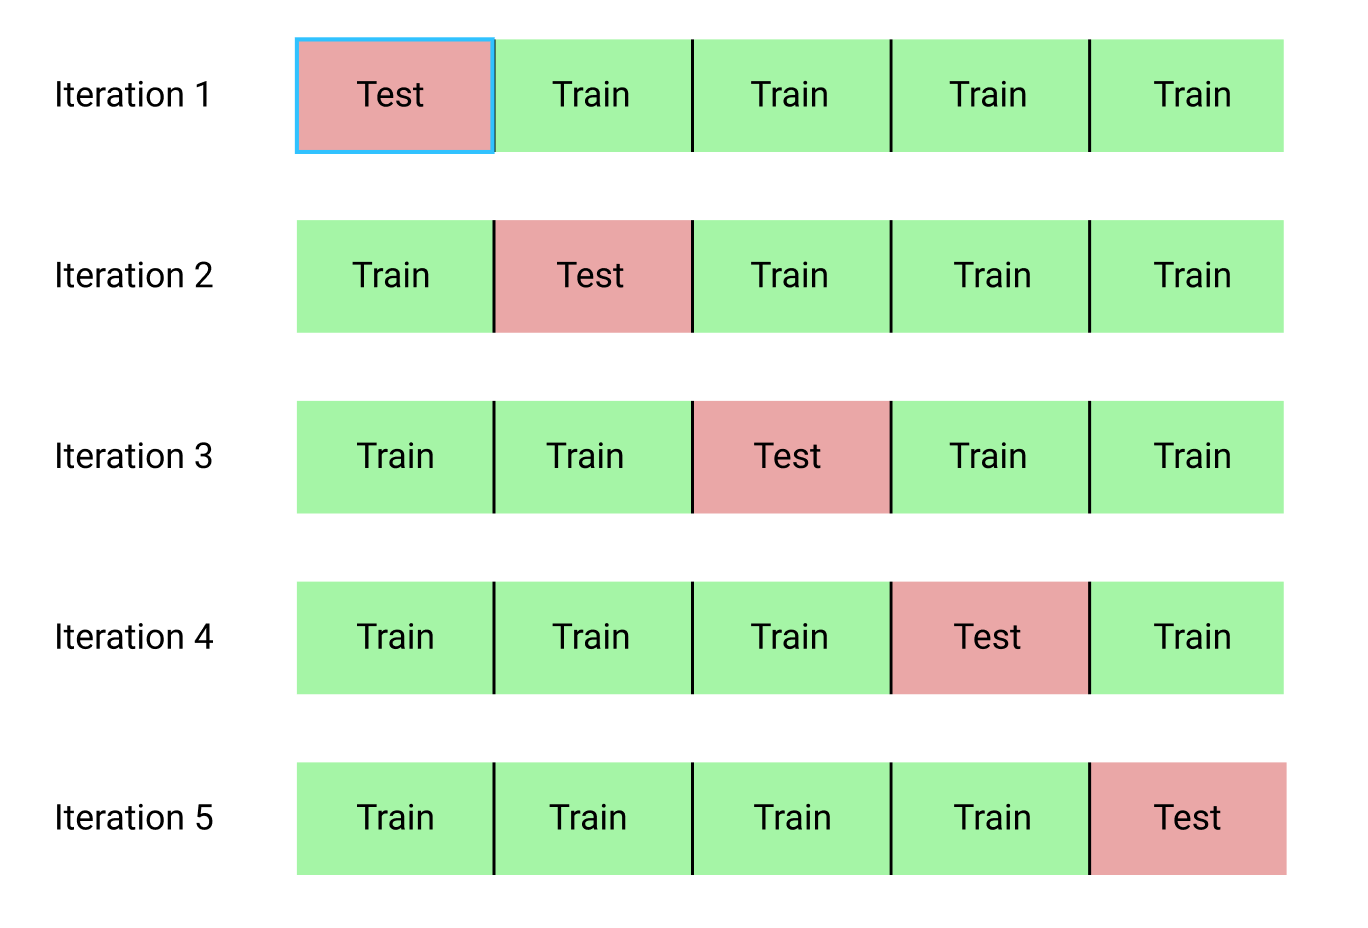

In [42]:
n_folds = 10
cv_error = np.average(cross_val_score(SVC(), X, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))


The 10-fold cross-validation accuracy score for this classifier is 0.59



In [43]:
# Import packages to visualize the accuracy of the model.

from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# The confusion matrix helps visualize the performance of the SVM model.

y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

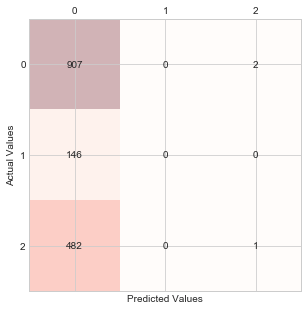

             precision    recall  f1-score   support

        0.0       0.59      1.00      0.74       909
        1.0       0.00      0.00      0.00       146
        2.0       0.33      0.00      0.00       483

avg / total       0.45      0.59      0.44      1538



c:\users\raaj__000\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [44]:
# Implementation of Confusion Matrix.

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

##### Now changing the predicitng Metrics

## Trying to predict if a person is Diabetic or Not.

In [45]:
# Assign predictors to a variable of ndarray (matrix) type.

array = data.values
X = array[:,0:17] #Feature variables, that the model learns the pattern in the dataset
y = array[:,18] #Target varibale, the pattern learned is used to predict these values

In [46]:
# Importing library packages for Support Vector Machine implmentation.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Divide records in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.75



##### Now, we can see how the accuracy has improved by changing to a smaller metric (From Readmission to Diabetetic)

In [51]:
# Import packages to visualize the accuracy of the model.

from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# The confusion matrix helps visualize the performance of the SVM model.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

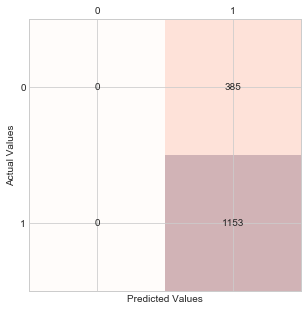

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       385
        1.0       0.75      1.00      0.86      1153

avg / total       0.56      0.75      0.64      1538



c:\users\raaj__000\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [52]:
# Implementation of Confusion Matrix.

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

### Reason for change in Score?

## More Optimization of the SVM Model for more Accuracy!

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd 
import numpy as np
from scipy.stats import norm

# Importing packages for developing SVM model for using SCI-Kit learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# Seaborn package for data visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4) 


The classifier accuracy score is 0.88


The 10-fold cross-validation accuracy score for this classifier is 0.88

             precision    recall  f1-score   support

        0.0       0.78      0.70      0.74       385
        1.0       0.90      0.94      0.92      1153

avg / total       0.87      0.88      0.87      1538



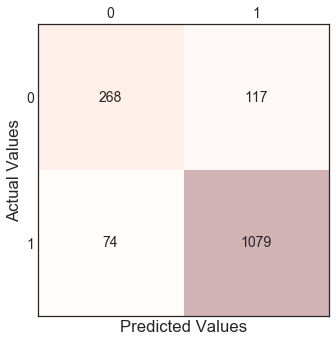

In [56]:
#Assign predictors to a variable of ndarray (matrix) type

array = data.values
X = array[:,0:17]  #Feature variables, that the model learns the pattern in the dataset
y = array[:,18] #Target varibale, the pattern learned is used to predict these values


# Normalize the  data
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

from sklearn.decomposition import PCA
# Extracting features that have more impact than the irregular patterns.
pca = PCA(n_components=10)
fit = pca.fit(Xs)
X_pca = pca.transform(Xs)

# Dividing the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the test set.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))

# Get average of 10-fold cross-validation.
n_folds = 10
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=n_folds))
print('\nThe {}-fold cross-validation accuracy score for this classifier is {:.2f}\n'.format(n_folds, cv_error))

# Visualizing the results with the help of confusion matrix
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred ))

# Implememnting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()


# Model 2: ADA Boosting

###### This model is used for further GUI implementation

In [131]:
# Assingning feature and target variables for the prediciton

feature_names = ['race','gender','age','admission_type_id','time_in_hospital','medical_specialty','num_lab_procedures','num_medications','diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult', 'metformin', 'insulin', 'change', 'diabetesMed','readmitted']
target_names = 'Diabetes'

In [132]:
#They are further assigned to 'x' and 'y'

x = data[feature_names]
y = data[target_names]

In [133]:
# Importing the library packages for Adaptive Boosting model using Sci-Kit learn.

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Dividing the training and testing sets
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

# Create Adaptive Boosting classifier
ab_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                            learning_rate=0.5, random_state=100)

# Train the classficiation model
ab_clf.fit(train_X, train_Y)
print("training....\n")

# Make prediction using the test set
ab_pred_diabetes = ab_clf.predict(test_X)
print('prediction: \n', ab_pred_diabetes)

print('\nparms: \n', ab_clf.get_params)

# Score of the model Accuracy
ab_clf_score = ab_clf.score(test_X, test_Y)
print("\nmean accuracy: %.2f" % ab_clf.score(test_X, test_Y))

training....

prediction: 
 [ 0.  0.  1. ...,  0.  0.  1.]

parms: 
 <bound method BaseEstimator.get_params of AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=100)>


ValueError: Can't handle mix of continuous-multioutput and binary

## Model 3: MLP Classifier

In [142]:
# Multi-Layered Perceptron or Simple Neural Network implementation Using S-K Learn library packages.
# Neural Network explanation and implementation are explored in the next jupyter notebooks.

from sklearn.neural_network import MLPClassifier

In [143]:
# Assigning hidden layers 
mlp = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

# Training the model
mlp.fit(X_train, y_train)
# Predcting using test set
mlp_pred_diabetes = mlp.predict(X_test)

print("parameter: ", mlp.get_params())

# Accuracy score of the test results
mlp_score = mlp.score(X_test, y_test)
mlp.score(X_test, y_test)

parameter:  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (1000, 300, 300), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


0.75162548764629389

# Real-life Prediction!!

In [63]:
data.head()

,race,gender,age,admission_type_id,time_in_hospital,medical_specialty,num_lab_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,insulin,change,diabetesMed,readmitted,Diabetes
26,3.0,1.0,85,1,6,1.0,64,18,427.0,428.00,414.0,7,2,3,2,1,1,0,1.0
74,3.0,0.0,75,1,5,1.0,34,17,414.0,411.00,276.0,7,2,2,4,1,1,2,1.0
98,4.0,0.0,55,1,2,8.0,53,6,590.0,250.01,401.0,3,3,2,4,1,1,0,1.0
107,3.0,0.0,85,1,3,3.0,34,11,427.0,428.00,414.0,8,1,2,2,0,0,2,0.0
114,3.0,1.0,75,1,14,1.0,78,19,434.0,250.60,250.7,8,1,2,4,1,1,1,0.0


##### The first data row is used for predicitons all along, for all GUI's implemented below.

In [134]:
# Predcitions using OrderedDict library package which is a digital dictionary to store huge number of values.

from collections import OrderedDict

new_data = OrderedDict([
    ('race', 3.0),
    ('gender', 1.0), 
    ('age', 85), 
    ('admission_type_id', 1), 
    ('time_in_hospital', 6), 
    ('medical_specialty', 1.0), 
    ('num_lab_procedures', 64), 
    ('num_medications', 18), 
    ('diag_1', 427.0),
    ('diag_2', 428.00),
    ('diag_3', 414.0),
    ('number_diagnoses', 7),
    ('A1Cresult', 2),
    ('metformin', 3),
    ('insulin', 2),
    ('change', 1),
    ('diabetesMed', 1),
    ('readmitted', 0)]
)

new_data = pd.Series(new_data).values.reshape(1,-1)

# Using Ada Boosting classifier for prediciton.
ab_clf.predict(new_data)

array([ 1.])

#### Widget User-Interface

In [116]:
# Import packages for using widgets.

from IPython.display import display
from ipywidgets import widgets

#Desing of widgets
print("Input Patients details")
text1 = widgets.FloatText()
display(text1)
text2 = widgets.FloatText()
display(text2)
text3 = widgets.FloatText()
display(text3)
text4 = widgets.FloatText()
display(text4)
text5 = widgets.FloatText()
display(text5)
text6 = widgets.FloatText()
display(text6)
text7 = widgets.FloatText()
display(text7)
text8 = widgets.FloatText()
display(text8)
text9 = widgets.FloatText()
display(text9)

Input Patients details


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [117]:
# The values received from previous widgets are used for predicitons.

from collections import OrderedDict

new_data = OrderedDict([
    ('race', text1.value),
    ('gender', text2.value), 
    ('age', text3.value), 
    ('admission_type_id', text4.value), 
    ('time_in_hospital', text5.value), 
    ('medical_specialty', text6.value), 
    ('num_lab_procedures', text7.value), 
    ('num_medications', text8.value), 
    ('diag_1', text9.value),
    ('diag_2', 428.00),
    ('diag_3', 414.0),
    ('number_diagnoses', 7),
    ('A1Cresult', 2),
    ('metformin', 3),
    ('insulin', 2),
    ('change', 1),
    ('diabetesMed', 1),
    ('readmitted', 0)]
)

new_data = pd.Series(new_data).values.reshape(1,-1)

ab_clf.predict(new_data)

array([ 1.])

## Graphical User Interface

In [147]:
# Import TKinter package for GUI implementation.

# Once the cell is run, the User interface will pop up, in whcih the same data-row details can be filled to predict
# if the person is Diabetic or Not.

from tkinter import * 
import tkinter 
from PIL import Image, ImageTk     

def click():     
    entered_text = textentry.get() 
    entered_text2 = textentry2.get()
    entered_text3 = textentry3.get()
    entered_text4 = textentry4.get()
    entered_text5 = textentry5.get()
    entered_text6 = textentry6.get()
    output.delete(0.0, END)     
      
    new_data = OrderedDict([
    ('race', 3.0),
    ('gender', entered_text), 
    ('age', entered_text2), 
    ('admission_type_id', 1), 
    ('time_in_hospital', 6), 
    ('medical_specialty', entered_text3), 
    ('num_lab_procedures', entered_text4), 
    ('num_medications',entered_text5), 
    ('diag_1', 427.0),
    ('diag_2', 428.00),
    ('diag_3', 414.0),
    ('number_diagnoses', 7),
    ('A1Cresult', entered_text6),
    ('metformin', 3),
    ('insulin', 2),
    ('change', 1),
    ('diabetesMed', 1),
    ('readmitted', 0)])

    new_data = pd.Series(new_data).values.reshape(1,-1)

    h= ab_clf.predict(new_data)    
    h.astype(int)   
    
    if h==1:
        defi = 'diabetic'
    else:
        defi = 'non-diabetic'
        
               
    output.insert(END,defi)  

    
window = Tk() 
window.title("MEDIC") 
window.configure(background="skyblue") 

photo1 = PhotoImage(file="C:\\Users\\raaj__000\\Desktop\\MEDIC Picures\\medic logo2.png") 


Label (window, image=photo1, bg="black") .grid(row=0, column=0, sticky=W)  

Label (window, text="Enter the details below:", bg="black", fg="white", font="none 18 bold") .grid(row=1, column=0, sticky=W)

Label (window, text=" ", bg="skyblue", fg="white", font="none 12 bold") .grid(row=2, column=0, sticky=W)  

Label (window, text="Gender | Age | medical_specialty | number of procedures | medications | A1cResult", bg="black", 
       fg="white", font="none 12 bold") .grid(row=3, column=0, sticky=W) 

textentry = Entry(window, width=60, bg="white")  
textentry.grid(row=4, column=0, sticky=W)  

textentry2 = Entry(window, width=60, bg="white")  
textentry2.grid(row=5, column=0, sticky=W) 


textentry3 = Entry(window, width=60, bg="white")  
textentry3.grid(row=6, column=0, sticky=W) 


textentry4 = Entry(window, width=60, bg="white")  
textentry4.grid(row=7, column=0, sticky=W) 


textentry5 = Entry(window, width=60, bg="white")  
textentry5.grid(row=8, column=0, sticky=W) 


textentry6 = Entry(window, width=60, bg="white")  
textentry6.grid(row=9, column=0, sticky=W) 

Button(window, text="SUBMIT", width=6, command=click) .grid(row=10, column=0, sticky=W)  

Label (window, text=" ", bg="skyblue", fg="white", font="none 12 bold") .grid(row=11, column=0, sticky=W) 

output = Text(window, width=60, height=2, wrap=WORD, background="white") 
output.grid(row=12, column=0, columnspan=2, sticky=W)


window.mainloop()

#### Is Diabetes the only deadly disease?

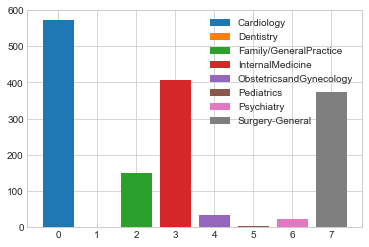

In [35]:
data3=data2[data2.weight != "?"]
data4=data3[data3.race != "?"]
data5=data4[data4.diag_2 != "?"]
data6=data5[data5.medical_specialty != "?"]

df3 = pd.DataFrame(data6, columns= ["medical_specialty"])

labels = []
for i, dfi in enumerate(df3.groupby(["medical_specialty"])):
    labels.append(dfi[0])
    plt.bar(i, dfi[1].count(), label=dfi[0])   
plt.xticks()
plt.legend()
plt.show()

# The highest number of Medical Specialty patients are from Cardiology